In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [109]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [110]:
df = pd.read_csv('results.csv')
columns = df.columns
columns

Index(['Unnamed: 0', 'vector_numpy_matmul', 'gpu_pytorch_matmul',
       'gpu_pycuda_matmul', 'gpu_pycuda_cublas', 'cuda_matmul',
       'parallel_matmul', 'single_thread_matmul', 'cpu_matmul',
       'cpu_parallel_matmul'],
      dtype='object')

In [120]:
df.multiply(1000).round(3).to_csv('rounded_results.csv')

In [132]:
df = pd.read_csv('rounded_results.csv')
columns = df.columns
columns

Index(['shape', 'vector_numpy_matmul', 'gpu_pytorch_matmul',
       'gpu_pycuda_matmul', 'gpu_pycuda_cublas', 'cuda_matmul',
       'parallel_matmul', 'single_thread_matmul', 'cpu_matmul',
       'cpu_parallel_matmul'],
      dtype='object')

In [142]:
df = df.replace(0, np.NaN)

In [155]:
name2beauty_name = {
    'parallel_matmul': 'Python Naive Multiprocessing (4)',
    'vector_numpy_matmul': 'Python Numpy Dot',
    'single_thread_matmul': 'Python Naive',
    'gpu_pytorch_matmul': 'Python Pytorch GPU',
    'gpu_pycuda_matmul': 'Python PyCuda Kernel',
    'gpu_pycuda_cublas': 'Python PyCuda High-Level cuBLAS',
    'cuda_matmul': 'Cython cuBLAS',
    'cpu_matmul': 'Cython CPU',
    'cpu_parallel_matmul': 'Cython CPU OpenMP (4)'
}

In [156]:
array_size = [2 ** i for i in range(3, 12)]

In [157]:
array_size

[8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [158]:
data = df.values

In [159]:
data[::, 1]

array([2.0000e-03, 3.0000e-03, 4.0000e-03, 8.0000e-03, 6.9500e-01,
       6.8400e-01, 2.7710e+00, 1.1251e+01, 4.4487e+01])

In [160]:
def draw_plot(iterator, title):
    fig = plt.figure(figsize=(12, 12))
    for i in iterator:
        plt.plot(data[::, i], '-o', label=name2beauty_name[columns[i]])
    plt.title(title)
    plt.xlabel("Matrix shape")
    plt.ylabel("Time (ms.)")
    plt.xticks(np.arange(0, len(array_size)), array_size)

    plt.grid()
    plt.legend()
    
    fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))

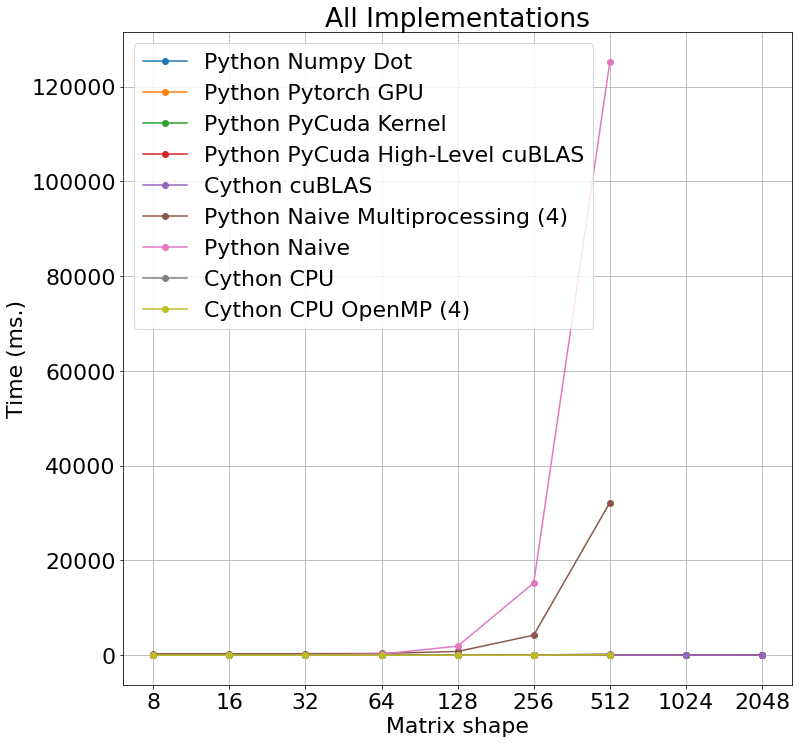

In [161]:
draw_plot(range(1, data.shape[1]), "All Implementations")

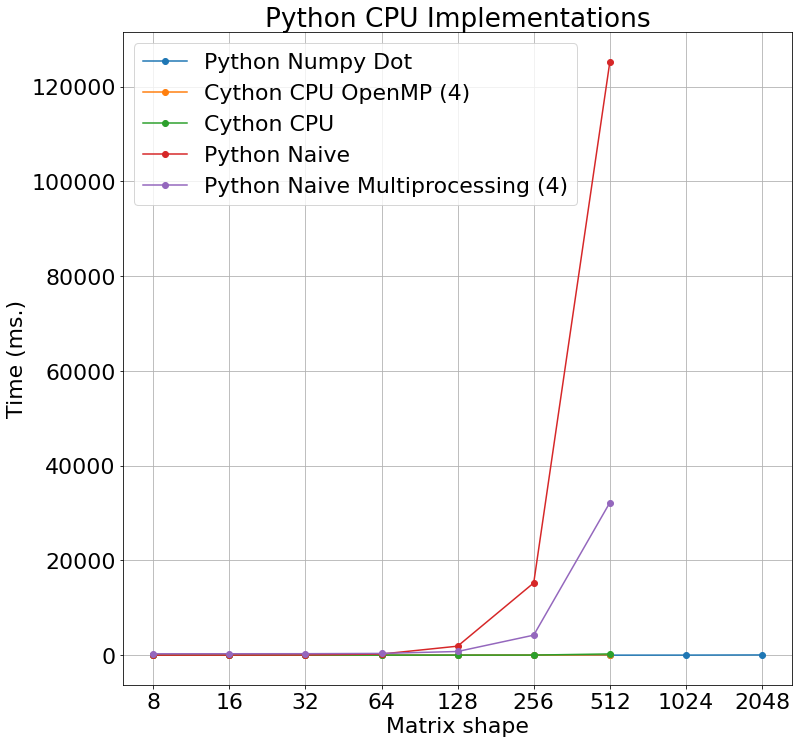

In [164]:
draw_plot([1, -1, -2, -3, -4], "Python CPU Implementations")

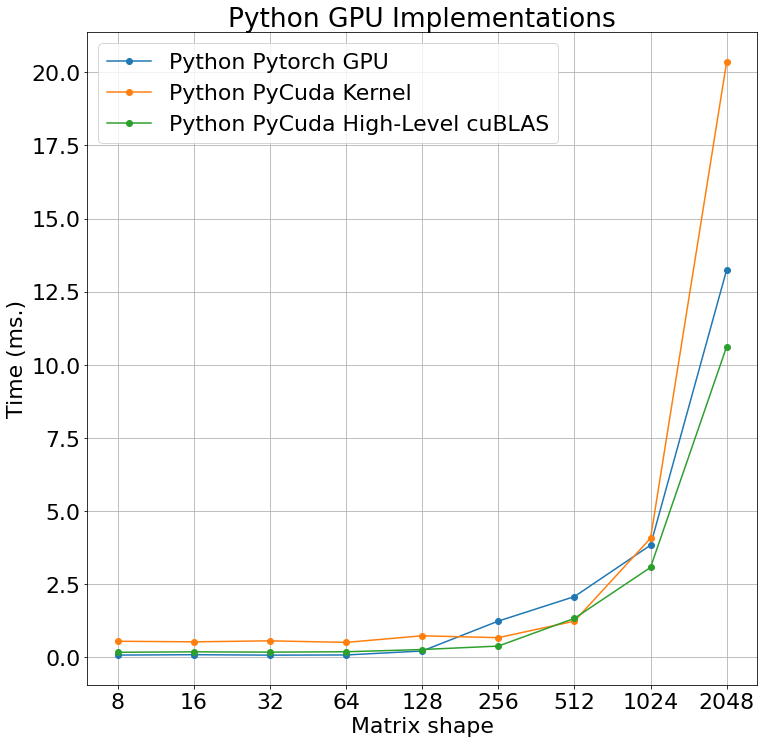

In [166]:
draw_plot(range(2, 2 + 3), "Python GPU Implementations")

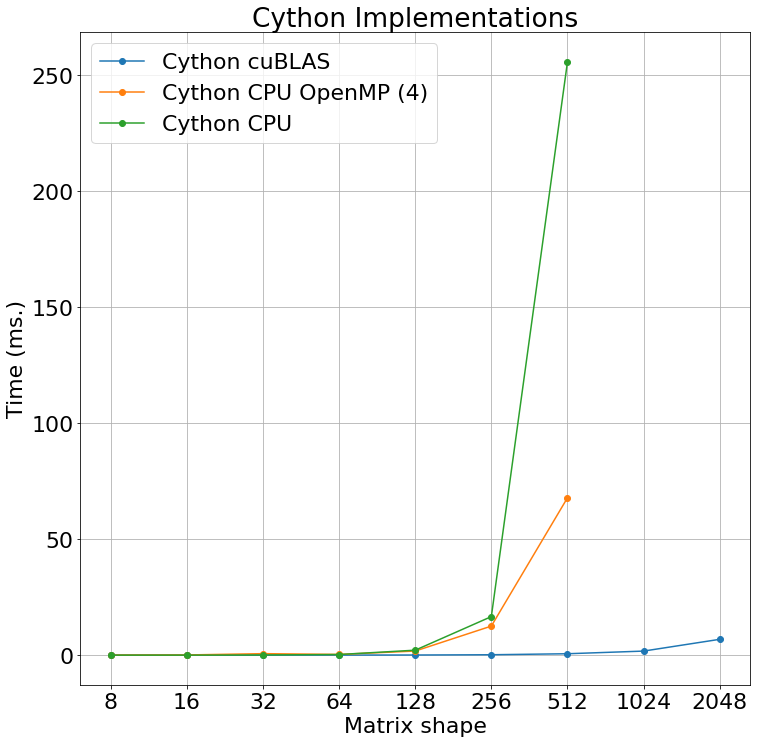

In [170]:
draw_plot([5, -1, -2], "Cython Implementations")

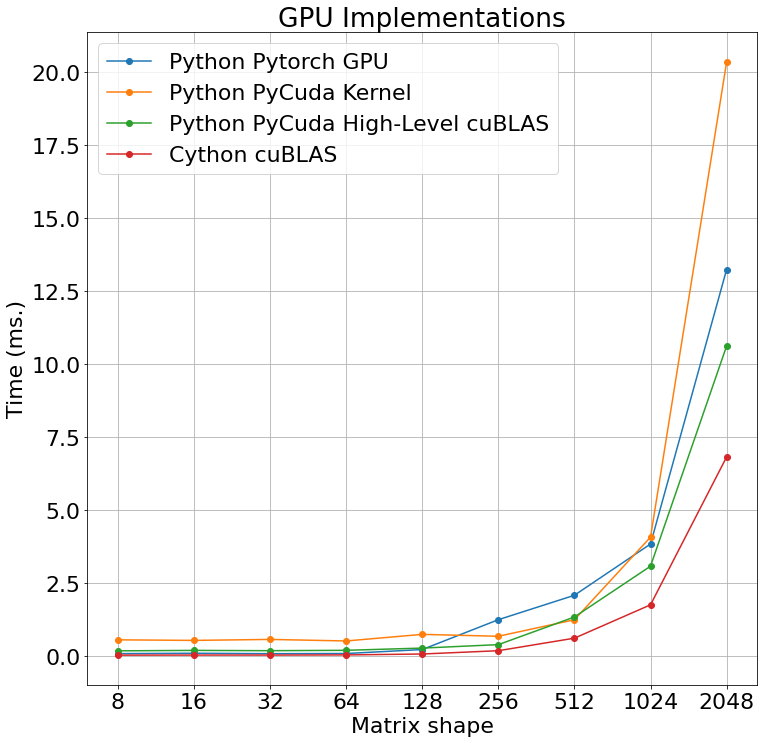

In [172]:
draw_plot([2, 3, 4, 5], "GPU Implementations")

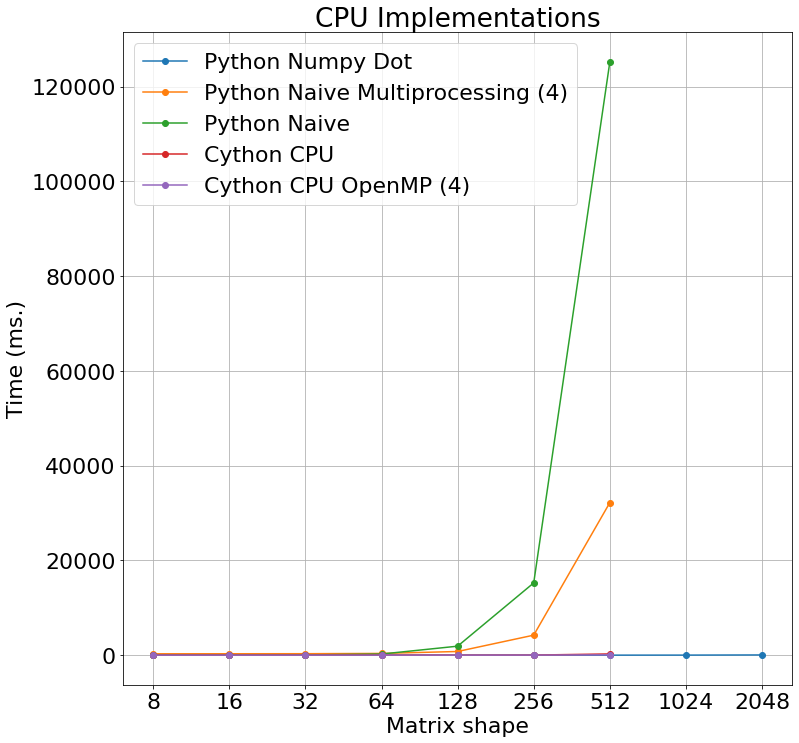

In [174]:
draw_plot(set(np.arange(1, data.shape[1])) - set([2, 3, 4, 5]), "CPU Implementations")

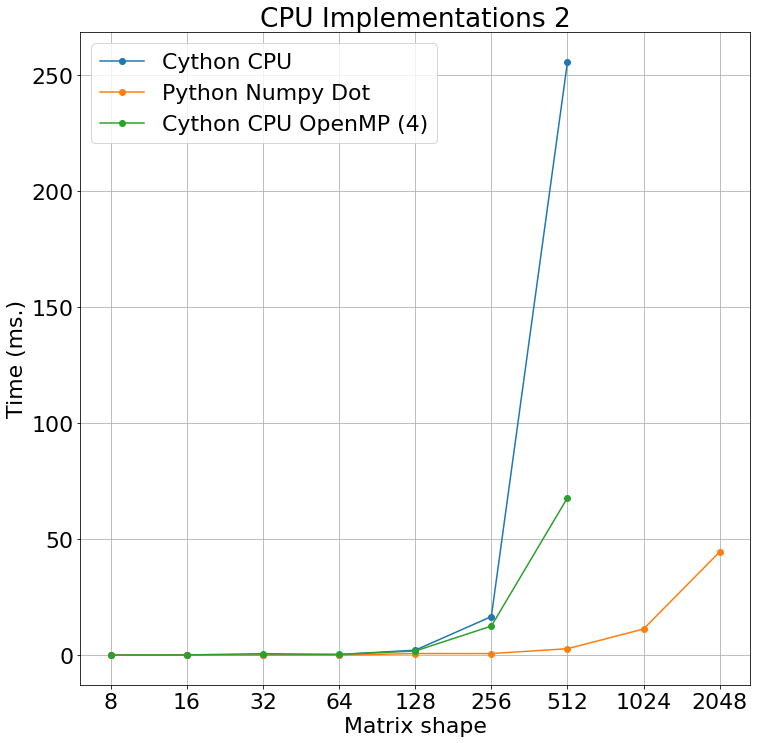

In [178]:
draw_plot(set(np.arange(1, data.shape[1])) - set([2, 3, 4, 5, 6, 7]), "CPU Implementations 2")

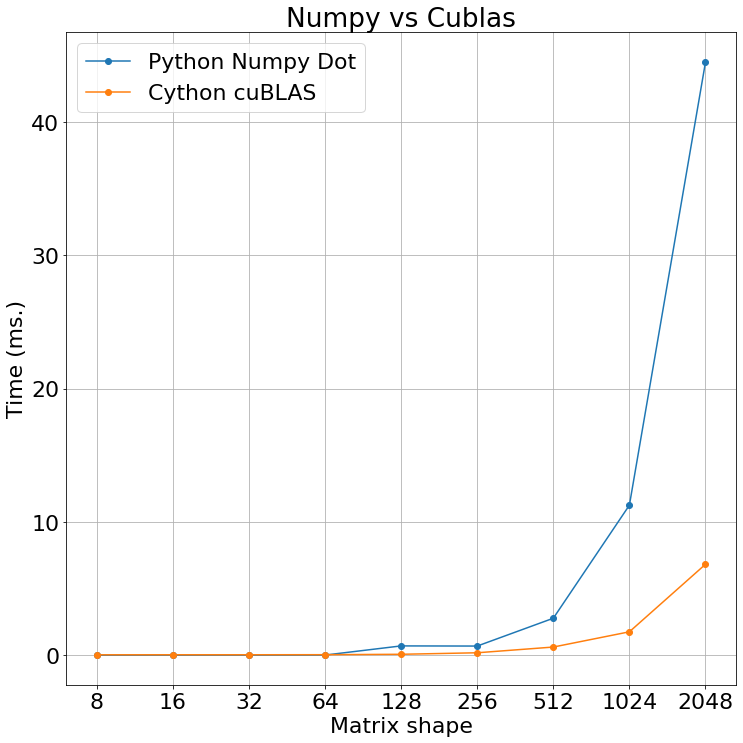

In [181]:
draw_plot([1, -5], "Numpy vs Cublas")

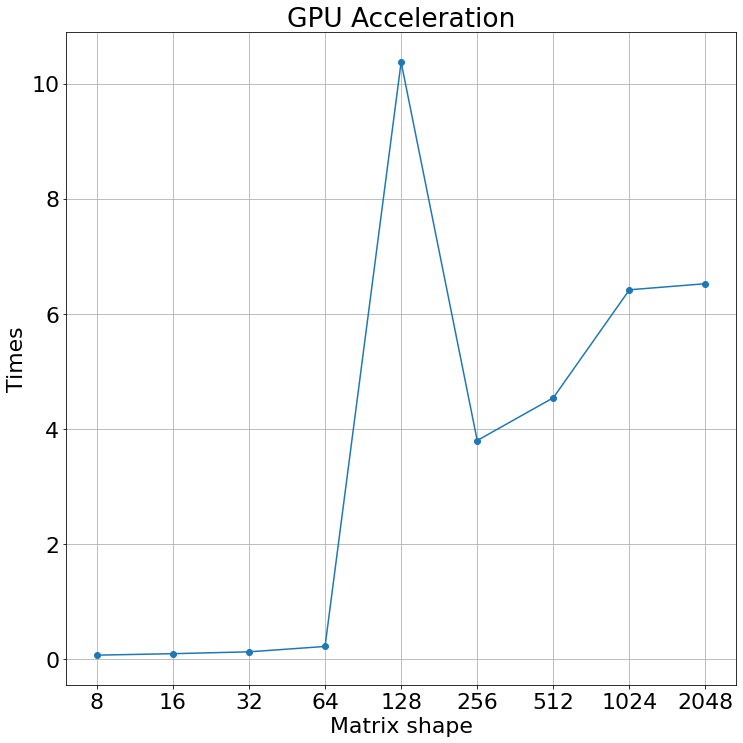

In [182]:
title = "GPU Acceleration"
fig = plt.figure(figsize=(12, 12))

plt.plot(np.arange(0, len(array_size)), data[::, 1] / data[::, -5], '-o')
    
plt.title(title)
plt.xlabel("Matrix shape")
plt.ylabel("Times")
plt.xticks(np.arange(0, len(array_size)), array_size)
plt.grid()

fig.savefig(os.path.join('images', title.replace(' ', '') + '.svg'))